In [1]:
!pip install pyyaml==5.1

import torch
TORCH_VERSION = ".".join(torch.__version__.split(".")[:2])
CUDA_VERSION = torch.__version__.split("+")[-1]
print("torch: ", TORCH_VERSION, "; cuda: ", CUDA_VERSION)
# Install detectron2 that matches the above pytorch version
# See https://detectron2.readthedocs.io/tutorials/install.html for instructions
!pip install detectron2 -f https://dl.fbaipublicfiles.com/detectron2/wheels/$CUDA_VERSION/torch$TORCH_VERSION/index.html
# If there is not yet a detectron2 release that matches the given torch + CUDA version, you need to install a different pytorch.

# exit(0)  # After installation, you may need to "restart runtime" in Colab. This line can also restart runtime


     |████████████████████████████████| 274 kB 2.3 MB/s eta 0:00:01
  Created wheel for pyyaml: filename=PyYAML-5.1-cp38-cp38-linux_x86_64.whl size=44075 sha256=c097fc53e1888a50ae69f2e16f63a8efec92b204b977e521ccb1887c089a9a9e
  Stored in directory: /home/rajdeep/.cache/pip/wheels/52/dd/2b/10ff8b0ac81b93946bb5fb9e6749bae2dac246506c8774e6cf
Successfully built pyyaml
ERROR: tf-models-official 2.6.0 requires tensorflow>=2.5.0, which is not installed.
ERROR: tf-models-official 2.6.0 requires tensorflow-datasets, which is not installed.
ERROR: tf-models-official 2.6.0 requires tensorflow-hub>=0.6.0, which is not installed.
ERROR: tf-models-official 2.6.0 requires tensorflow-model-optimization>=0.4.1, which is not installed.
ERROR: tf-models-official 2.6.0 requires tensorflow-text>=2.5.0, which is not installed.
ERROR: awscli 1.18.135 has requirement colorama<0.4.4,>=0.2.5, but you'll have colorama 0.4.4 which is incompatible.
torch:  1.8 ; cuda:  cu102
Looking in links: https://dl.fbaipublic

In [1]:
import detectron2
from detectron2.utils.logger import setup_logger

In [2]:
import numpy as np
import os, json, cv2, random
import cv2
%matplotlib inline
from matplotlib import pyplot as plt

In [3]:
from detectron2 import model_zoo
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog, DatasetCatalog

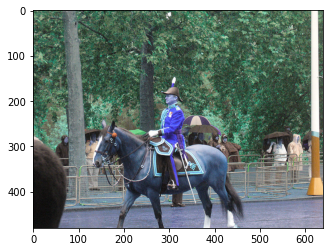

In [4]:
!wget http://images.cocodataset.org/val2017/000000439715.jpg -q -O input.jpg
im = cv2.imread("./input.jpg")
plt.imshow(im)
plt.show()

In [5]:
cfg = get_cfg()
# add project-specific config (e.g., TensorMask) here if you're not running a model in detectron2's core library
cfg.merge_from_file(model_zoo.get_config_file("configs/ade20k-150/maskformer_R50_bs16_160k.yaml"))
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.5  # set threshold for this model
# Find a model from detectron2's model zoo. You can use the https://dl.fbaipublicfiles... url as well
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml")
predictor = DefaultPredictor(cfg)
outputs = predictor(im)

RuntimeError: configs/ade20k-150/maskformer_R50_bs16_160k.yaml not available in Model Zoo!

In [13]:
from detectron2 import model_zoo
model = model_zoo.get("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_1x.yaml", trained=True)

RuntimeError: COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_1x.yaml not available in Model Zoo!